In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import pickle

from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score 
from sklearn.preprocessing import StandardScaler
import joblib

df=pd.read_csv('MRec.csv')
data=pd.read_csv('MRec2.csv')
df.head()

,Age,Gender,Mood,Genre
0,55,F,Happy,Rock
1,55,F,Gloomy,Blues
2,55,F,Stressed,Rock
3,55,F,Relaxing,Instrumental
4,55,F,Energetic,Hiphop


In [33]:
df.tail()

,Age,Gender,Mood,Genre
725,17,F,Happy,Pop
726,17,F,Gloomy,Pop
727,17,F,Stressed,Pop
728,17,F,Relaxing,Pop
729,17,F,Energetic,Pop


In [34]:
#Mean, std, and quartiles of dataset
data.describe()

,Age
count,154.000000
mean,27.064935
std,8.047795
min,17.000000
25%,21.000000
50%,24.000000
75%,32.000000
max,55.000000


In [35]:
#Checking for null values to fill
print("Number of null values:")
print(df.isnull().sum())

Number of null values:
Age       0
Gender    0
Mood      0
Genre     0
dtype: int64


In [36]:
#Checking number of unique values and wrong entries like symbols -,?,#,*,etc.
for col in df.columns:
    print('{} : {}'.format(col,df[col].unique()))

Age : [55 49 47 45 43 42 39 37 36 34 33 32 31 30 29 28 27 26 25 24 23 22 21 20
 19 18 17]
Gender : ['F' 'M']
Mood : ['Happy' 'Gloomy' 'Stressed' 'Relaxing' 'Energetic']
Genre : ['Rock' 'Blues' 'Instrumental' 'Hiphop' 'Pop' 'Indie/Acoustic' 'Country'
 'EDM' 'INStrumental']


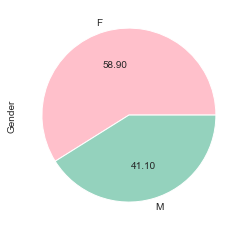

In [37]:
#Distribution of gender by pie-chart
df['Gender'].value_counts().plot(kind="pie", autopct="%.2f", colors = ['pink', '#94d2bd'])
plt.show()

In [38]:
#Dropping empty columns
df = df.dropna(axis='columns', how='all')

print("Data after dropping empty columns:")
print(df.shape)

Data after dropping empty columns:
(730, 4)


In [39]:
#Replacing categorical data with integer values

df['Gender'].replace(['M','F'],[0,1], inplace=True)
df['Mood'].replace(['Happy','Gloomy','Stressed','Relaxing','Energetic'],[1,2,3,4,5], inplace=True)

#Replace null values with NaN
df['Age'].replace('  ', np.nan, inplace=True)
df= df.dropna(subset=['Age'])
df['Gender'].replace('  ', np.nan, inplace=True)
df= df.dropna(subset=['Gender'])
df['Mood'].replace('  ', np.nan, inplace=True)
df= df.dropna(subset=['Mood'])

df.head(7)


,Age,Gender,Mood,Genre
0,55,1,1,Rock
1,55,1,2,Blues
2,55,1,3,Rock
3,55,1,4,Instrumental
4,55,1,5,Hiphop
5,49,0,1,Rock
6,49,0,2,Pop


In [40]:
#Replacing NaN instances with mean values
columns=df[['Age','Gender']]
for col in columns:
    df[col]=pd.to_numeric(df[col])
    df[col].fillna(df[col].mean(), inplace=True)
df.head(7)

,Age,Gender,Mood,Genre
0,55,1,1,Rock
1,55,1,2,Blues
2,55,1,3,Rock
3,55,1,4,Instrumental
4,55,1,5,Hiphop
5,49,0,1,Rock
6,49,0,2,Pop


In [10]:
#Checking for null values again
df.isnull().sum()

Age       0
Gender    0
Mood      0
Genre     0
dtype: int64

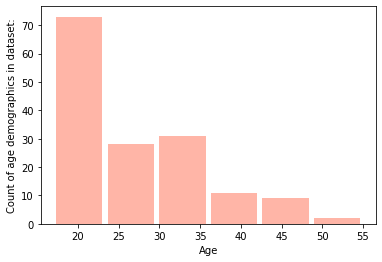

In [11]:
#Histogram of age
plt.hist(data['Age'], bins=6, rwidth=0.9, color="#ffb5a7")
plt.xlabel("Age")
plt.ylabel("Count of age demographics in dataset:")

plt.show()

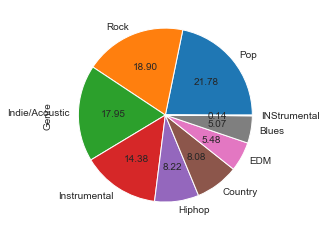

In [41]:
#Distribution of genre by pie-chart
df['Genre'].value_counts().plot(kind="pie", autopct="%.2f")
plt.show()

(array([23., 11., 14.,  0., 74., 12.,  0.,  7.,  8.,  5.]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <BarContainer object of 10 artists>)

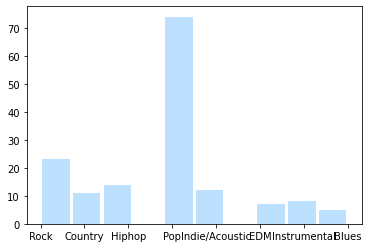

In [13]:
plt.hist(data['Happy'],color = "#bde0fe", rwidth=0.9)

(array([27., 15., 46.,  0., 24., 11.,  0.,  6.,  6., 19.]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <BarContainer object of 10 artists>)

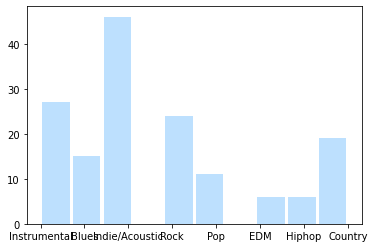

In [14]:
plt.hist(data['Gloomy'],color = "#bde0fe", rwidth=0.9)

(array([20., 45., 20.,  0., 12., 30.,  0.,  9., 10.,  8.]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <BarContainer object of 10 artists>)

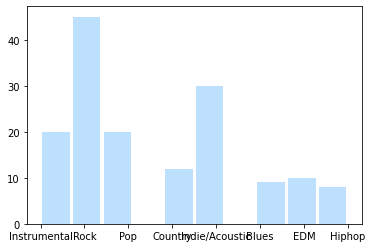

In [15]:
plt.hist(data['Stressed'],color = "#bde0fe", rwidth=0.9)

(array([42.,  9., 21.,  0., 39.,  3.,  0., 32.,  5.,  3.]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <BarContainer object of 10 artists>)

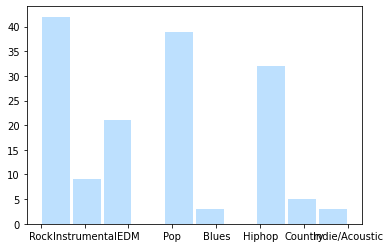

In [16]:
plt.hist(data['Energetic'],color = "#bde0fe", rwidth=0.9)

(array([51.,  4., 45.,  0., 15., 18.,  0.,  8.,  9.,  4.]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <BarContainer object of 10 artists>)

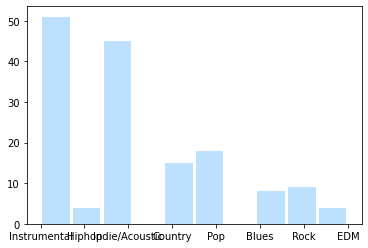

In [17]:
plt.hist(data['Relaxing'],color = "#bde0fe", rwidth=0.9)

<AxesSubplot:xlabel='Age', ylabel='Genre'>

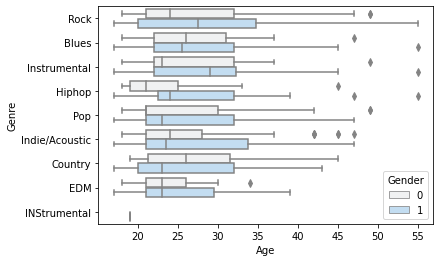

In [18]:
#Boxplot between Age and Genre, coloured by Gender
sns.boxplot(x='Age',y='Genre',hue='Gender',color = '#bbdef9',data=df)

<AxesSubplot:xlabel='Genre', ylabel='Mood'>

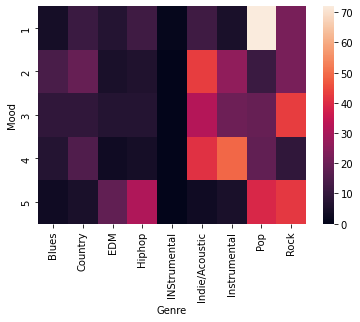

In [19]:
#Correlation between Mood and Genre
sns.heatmap(pd.crosstab(df['Mood'], df['Genre']))

<AxesSubplot:xlabel='Happy', ylabel='Age'>

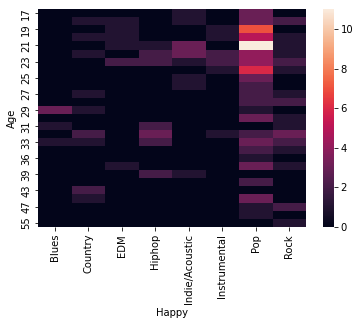

In [20]:
#Correlation between which Genre is preferred by age groups when Happy
sns.heatmap(pd.crosstab(data['Age'], data['Happy']))

<AxesSubplot:xlabel='Gloomy', ylabel='Age'>

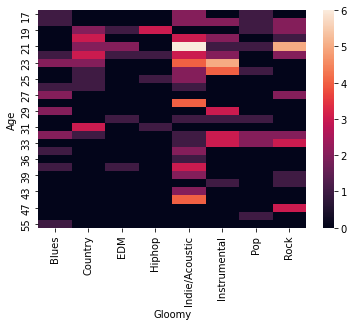

In [21]:
#Correlation between which Genre is preferred by age groups when Gloomy
sns.heatmap(pd.crosstab(data['Age'], data['Gloomy']))

<AxesSubplot:xlabel='Stressed', ylabel='Age'>

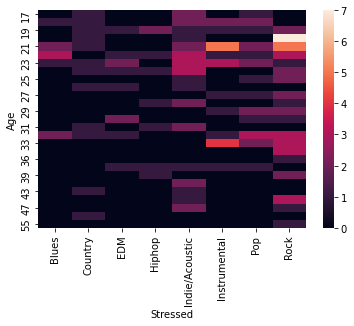

In [22]:
#Correlation between which Genre is preferred by age groups when Stressed
sns.heatmap(pd.crosstab(data['Age'], data['Stressed']))

<AxesSubplot:xlabel='Relaxing', ylabel='Age'>

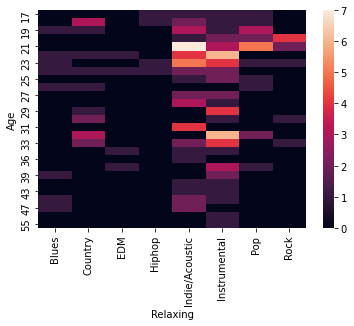

In [23]:
#Correlation between which Genre is preferred by age groups when Relaxing
sns.heatmap(pd.crosstab(data['Age'], data['Relaxing']))

<AxesSubplot:xlabel='Energetic', ylabel='Age'>

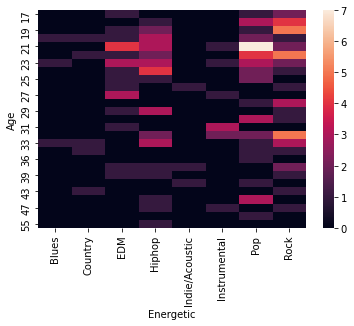

In [24]:
#Correlation between which Genre is preferred by age groups when Energetic
sns.heatmap(pd.crosstab(data['Age'], data['Energetic']))

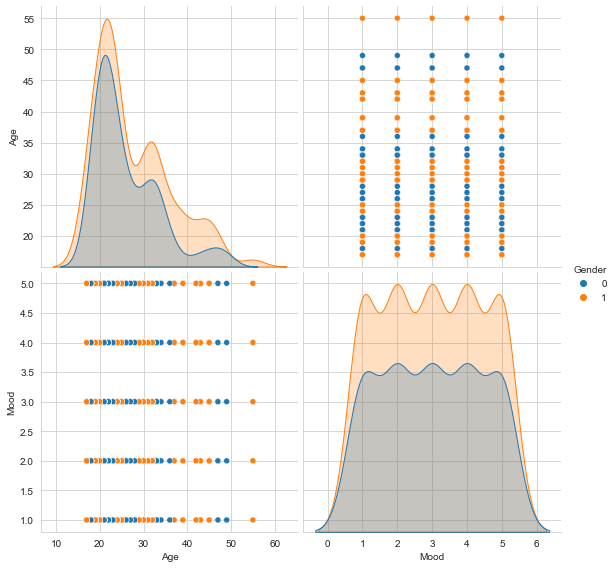

In [25]:
#Pairplot between all numerical categories
sns.set_style("whitegrid");
columns = ['Age','Gender','Mood']
sns.pairplot(df[columns], hue="Gender",height = 4 ,kind ='scatter',diag_kind='kde')
plt.show()

In [26]:
#Model testing
X=df[['Age','Gender','Mood']]
y=df['Genre']
X_train,X_test,y_train,y_test=train_test_split(X.values,y,test_size = 0.25, random_state = 1000)
model=DecisionTreeClassifier()
model=model.fit(X_train, y_train)

In [27]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train_norm = norm.transform(X_train)

# transform testing dataabs
X_test_norm = norm.transform(X_test)

from joblib import dump, load
joblib.dump(model,'C:/Users/User/Music_Recommendation_App/MusicApp/music_predict.joblib')

predictions=model.predict(X_test)

In [28]:
import pickle
import joblib
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

sc= MinMaxScaler
mdl = joblib.load('C:/Users/User/Music_Recommendation_App/MusicApp/music_predict.joblib')
X= pd.read_csv('MRec.csv')
X_test = [[21,1,1],[22,0,4],[29,0,5],[31,0,4],[55,1,4]]
y_pred=mdl.predict(X_test)

val=pd.DataFrame(y_pred, columns=['Genre'])
val

,Genre
0,Pop
1,EDM
2,Hiphop
3,Country
4,Indie/Acoustic


In [29]:
#Load saved model
lr = joblib.load('C:/Users/User/Music_Recommendation_App/MusicApp/music_predict.joblib')
#with open('C:/Users/User/Music_Recommendation_App/MusicApp/music_predict.sav' , 'rb') as f:
#    lr = pickle.load(f)
X=[[21,1,1],[22,0,4],[29,0,5],[31,0,4],[55,1,4]]
lr.predict(X)

array(['Pop', 'EDM', 'Hiphop', 'Country', 'Indie/Acoustic'], dtype=object)

<AxesSubplot:>

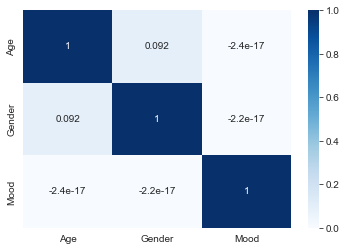

In [42]:
#Relationship analysis
sns.heatmap(df.corr(),cbar=True, annot=True, cmap='Blues')

In [31]:
#Outliers
#q1=df.quantile(0.25)
#q3=df.quantile(0.75)
#iqr=q3-q1

#print(   (df<(q1-1.5*iqr)) | (df>(q3+1.5*iqr))  )

#y_pred = model.predict(X_test)
#print("accuracy_score: %.2f" % accuracy_score(y_test, y_pred))